In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd

trader_data = pd.read_csv('/content/drive/My Drive/ds_Hari_Priya/csv_files/historical_data.csv')
sentiment_data = pd.read_csv('/content/drive/My Drive/ds_Hari_Priya/csv_files/fear_greed_index.csv')



In [6]:

trader_data.info()
trader_data.shape
trader_data.head()
sentiment_data.info()
sentiment_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [7]:
trader_data.isnull().sum()
trader_data.duplicated().sum()


np.int64(0)

In [9]:
# First, print a sample
print(trader_data.columns.tolist())

# Define key columns based on your dataset
key_cols = ['Account', 'Coin', 'Timestamp IST']

# Count duplicates using those columns
print("Duplicates (based on subset):", trader_data.duplicated(subset=key_cols).sum())

# Drop duplicates (keeping first occurrence)
trader_data_clean = trader_data.drop_duplicates(subset=key_cols, keep='first').reset_index(drop=True)

# Show shape before/after
print("Shape before:", trader_data.shape)
print("Shape after:", trader_data_clean.shape)

# Save cleaned file
trader_data_clean.to_csv('/content/drive/MyDrive/ds_Hari_Priya/csv_files/historical_data_clean.csv', index=False)


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Duplicates (based on subset): 174756
Shape before: (211224, 16)
Shape after: (36468, 16)


In [10]:
# Check the first few rows to ensure data integrity
print(trader_data_clean.head())

# Verify the shape to ensure no unintended changes
print("Cleaned data shape:", trader_data_clean.shape)


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9457   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9271   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.4791   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.5204   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1         7.27     57.77  BUY  02-12-2024 22:51     2998.950000       Buy   
2       100.00    792.71  BUY  02-12-2024 22:54     5000.249301       Buy   
3         2.00     14.96  BUY  02-12-2024 23:13     6999.549302       Buy   
4       100.00    752.04  BUY  02-12-2024 23:21     8998.849302       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [11]:
# Save the cleaned dataset to your CSV folder
cleaned_file_path = '/content/drive/MyDrive/ds_Hari_Priya/csv_files/historical_data_clean.csv'
trader_data_clean.to_csv(cleaned_file_path, index=False)


In [14]:
#printing column names before merging
print("Trader Data Columns:", trader_data.columns.tolist())
print("Sentiment Data Columns:", sentiment_data.columns.tolist())


Trader Data Columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Sentiment Data Columns: ['timestamp', 'value', 'classification', 'date']


In [17]:
#Removing spaces and converting the cases
trader_data.columns = trader_data.columns.str.strip().str.lower()
sentiment_data.columns = sentiment_data.columns.str.strip().str.lower()


In [68]:
#conversion of date time
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'])
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
print(trader_data['timestamp'].dtype)
print(sentiment_data['date'].dtype)



datetime64[ns]
datetime64[ns]


In [27]:
#Conversion of sentiment data
print("Sentiment Data Columns:", sentiment_data.columns.tolist())
sentiment_data.columns = sentiment_data.columns.str.strip().str.lower()
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
print(sentiment_data['date'].dtype)


Sentiment Data Columns: ['timestamp', 'value', 'classification', 'date']
datetime64[ns]


In [40]:
import pandas as pd

# Convert 'Timestamp IST' in trader data to datetime
trader_data_clean['Timestamp IST'] = pd.to_datetime(trader_data_clean['Timestamp IST'])

# Convert 'timestamp' in sentiment data to datetime
sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])


In [41]:
# Merge the datasets on the nearest timestamp
merged_data = pd.merge_asof(
    trader_data_clean.sort_values('Timestamp IST'),
    sentiment_data.sort_values('timestamp'),
    left_on='Timestamp IST',
    right_on='timestamp',
    direction='nearest'
)

# Display the first few rows of the merged dataset
print(merged_data.head())


                                      Account Coin  Execution Price  \
0  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
1  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  BTC          41867.0   
2  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   
3  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2252.3   
4  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  BTC          42748.0   

   Size Tokens  Size USD  Side       Timestamp IST  Start Position  \
0       0.0967    183.53   BUY 2023-05-01 01:06:00         0.00000   
1       0.0150    628.00  SELL 2023-12-05 03:11:00         0.00000   
2       0.4933   1100.11   BUY 2023-12-05 03:11:00         0.00000   
3      11.2119  25252.56  SELL 2023-12-14 01:20:00        11.21190   
4       0.0150    641.22   BUY 2023-12-14 01:20:00        -0.59711   

     Direction  Closed PnL                                   Transaction Hash  \
0    Open Long    0.000000  0x875d3e1af52b5b758e4f04015b774e0111006a118

In [43]:
# Check for any rows where the merge did not find a match
unmerged_rows = merged_data[merged_data['classification'].isnull()]
print(f"Number of rows without sentiment match: {len(unmerged_rows)}")

# Optionally, inspect the first few rows of the merged dataset
print(merged_data.head())


Number of rows without sentiment match: 0
                                      Account Coin  Execution Price  \
0  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  ETH           1897.9   
1  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  BTC          41867.0   
2  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2230.1   
3  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  ETH           2252.3   
4  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  BTC          42748.0   

   Size Tokens  Size USD  Side       Timestamp IST  Start Position  \
0       0.0967    183.53   BUY 2023-05-01 01:06:00         0.00000   
1       0.0150    628.00  SELL 2023-12-05 03:11:00         0.00000   
2       0.4933   1100.11   BUY 2023-12-05 03:11:00         0.00000   
3      11.2119  25252.56  SELL 2023-12-14 01:20:00        11.21190   
4       0.0150    641.22   BUY 2023-12-14 01:20:00        -0.59711   

     Direction  Closed PnL                                   Transaction Hash  \
0    Open Long    0.000000  0

In [54]:
# Get summary statistics for numerical columns
summary_stats = merged_data.describe()
print(summary_stats)


       execution price   size tokens      size usd  \
count     36468.000000  3.646800e+04  3.646800e+04   
mean      10281.176727  1.137274e+04  4.883988e+03   
min           0.000005  8.740000e-07  0.000000e+00   
25%           1.130225  4.200000e+00  1.362000e+02   
50%          14.550000  3.940000e+01  4.998000e+02   
75%          49.024000  3.387450e+02  1.499980e+03   
max      109004.000000  1.582244e+07  3.719141e+06   
std       28471.007696  2.121044e+05  4.872111e+04   

                       timestamp ist  start position     closed pnl  \
count                          36468    3.646800e+04   36468.000000   
mean   2025-01-05 05:24:58.476472576   -6.758383e+04      54.377066   
min              2023-05-01 01:06:00   -1.397130e+07  -34338.534090   
25%              2024-12-11 19:18:45   -2.950000e+02       0.000000   
50%              2025-01-20 07:46:00    1.454000e-02       0.000000   
75%              2025-03-04 01:27:00    1.185075e+03       2.739066   
max             

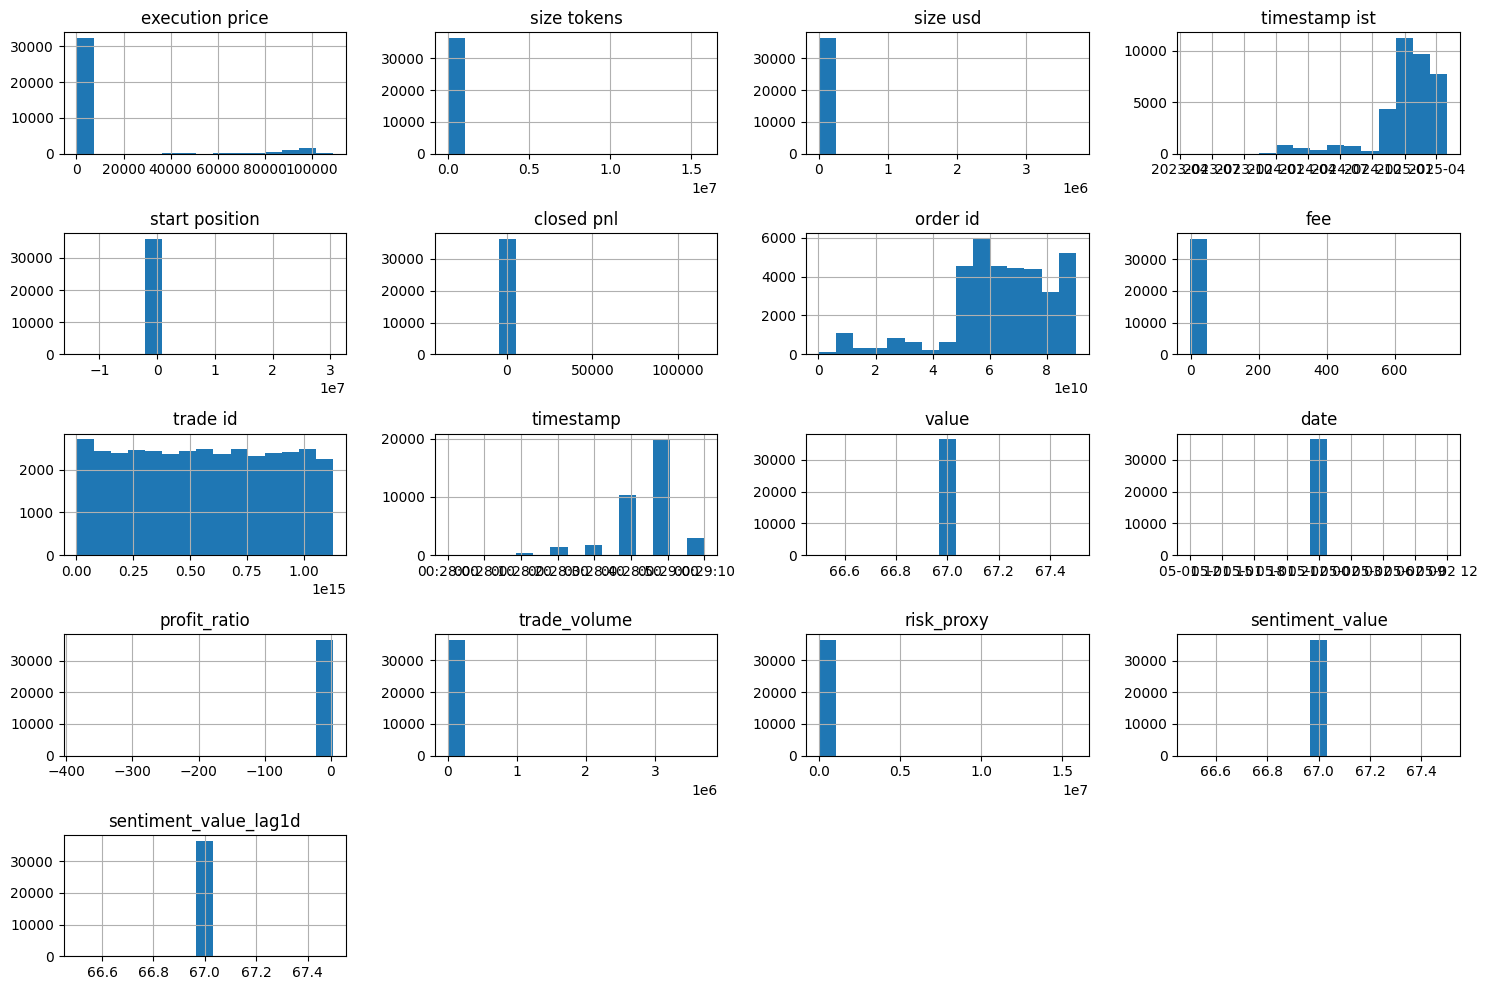

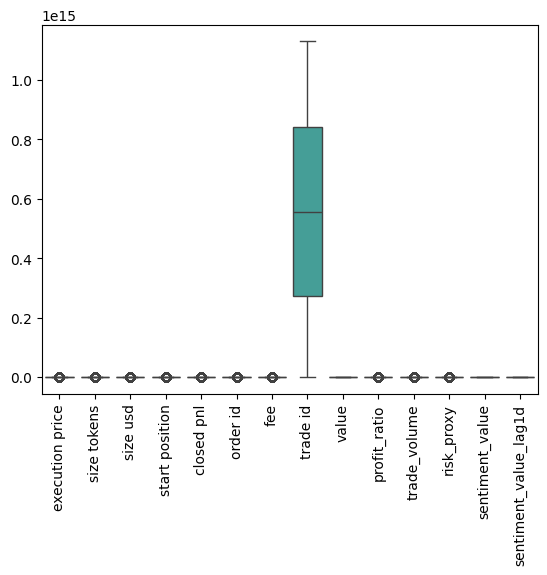

In [67]:
#VISUALIZATION PART STARTS

import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns - keep this
merged_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Select numeric columns only for boxplot
numeric_cols = merged_data.select_dtypes(include=['number']).columns

sns.boxplot(data=merged_data[numeric_cols])
plt.xticks(rotation=90)
plt.show()


In [56]:
#Checking the columns in merged data
print("merged Data Columns:", merged_data.columns.tolist())

merged Data Columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'timestamp', 'value', 'classification', 'date']


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fix duplicate column names by appending suffixes to duplicates
def make_unique(cols):
    seen = {}
    new_cols = []
    for col in cols:
        if col not in seen:
            seen[col] = 1
            new_cols.append(col)
        else:
            new_col = f"{col}.{seen[col]}"
            seen[col] += 1
            while new_col in seen:
                new_col = f"{col}.{seen[col]}"
                seen[col] += 1
            new_cols.append(new_col)
            seen[new_col] = 1
    return new_cols

merged_data.columns = make_unique(merged_data.columns.tolist())
print("Fixed columns:", merged_data.columns.tolist())

# Step 2: Choose the correct timestamp column and convert it to datetime
# Let's print some sample values to decide which timestamp to use
print(merged_data[['timestamp', 'timestamp.1']].head())

# Assuming the first 'timestamp' column is the right one, convert it:
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

# Optional: drop other duplicate timestamp columns if unnecessary
if 'timestamp.1' in merged_data.columns:
    merged_data.drop(columns=['timestamp.1'], inplace=True)

# Step 3: Create new trading behavior features and sentiment aggregation

# Profitability ratio (avoid division by zero)
merged_data['profit_ratio'] = merged_data.apply(
    lambda row: row['closed pnl'] / row['size usd'] if row['size usd'] != 0 else 0, axis=1)

# Trade volume proxy
merged_data['trade_volume'] = merged_data['size usd']

# Risk proxy (absolute size tokens)
merged_data['risk_proxy'] = merged_data['size tokens'].abs()

# Ensure sentiment classification is categorical
merged_data['classification'] = merged_data['classification'].astype('category')

# Aggregate sentiment value and classification hourly
sentiment_agg = merged_data.groupby(pd.Grouper(key='timestamp', freq='1H')).agg({
    'value': 'mean',
    'classification': lambda x: x.mode()[0] if not x.mode().empty else 'neutral'
}).rename(columns={'value': 'sentiment_value', 'classification': 'sentiment_classification'})

# Merge sentiment aggregati


Fixed columns: ['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side', 'timestamp ist', 'start position', 'direction', 'closed pnl', 'transaction hash', 'order id', 'crossed', 'fee', 'trade id', 'timestamp', 'timestamp.1', 'value', 'classification', 'date']
      timestamp                   timestamp.1
0  1.680000e+12 1970-01-01 00:00:01.746163800
1  1.700000e+12 1970-01-01 00:00:01.746163800
2  1.700000e+12 1970-01-01 00:00:01.746163800
3  1.700000e+12 1970-01-01 00:00:01.746163800
4  1.700000e+12 1970-01-01 00:00:01.746163800


/tmp/ipython-input-3260901878.py:53: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sentiment_agg = merged_data.groupby(pd.Grouper(key='timestamp', freq='1H')).agg({


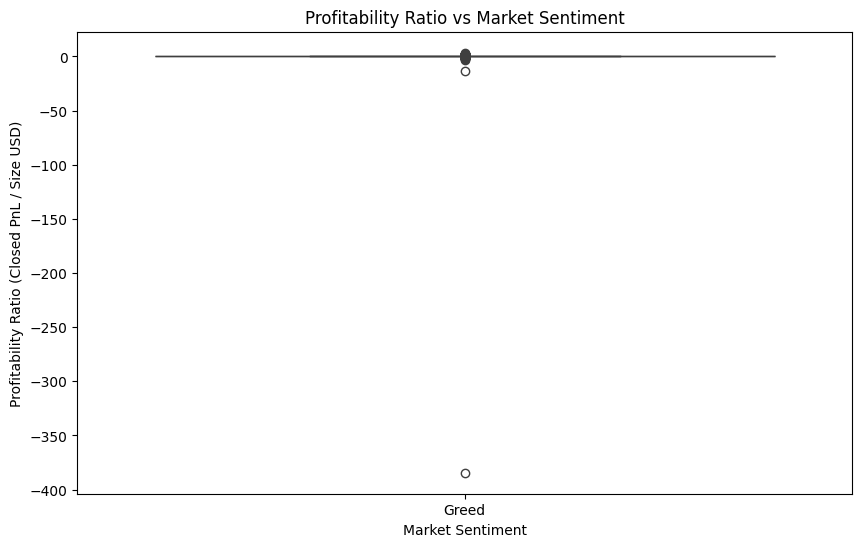

In [69]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_classification', y='profit_ratio', data=merged_data)
plt.title('Profitability Ratio vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Profitability Ratio (Closed PnL / Size USD)')
plt.show()


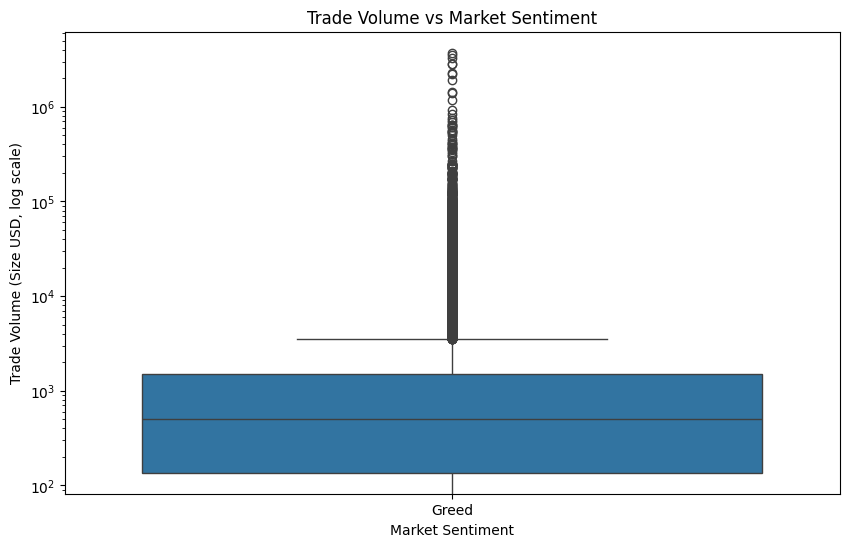

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_classification', y='trade_volume', data=merged_data)
plt.yscale('log')  # volume can be skewed, log scale helps
plt.title('Trade Volume vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Volume (Size USD, log scale)')
plt.show()


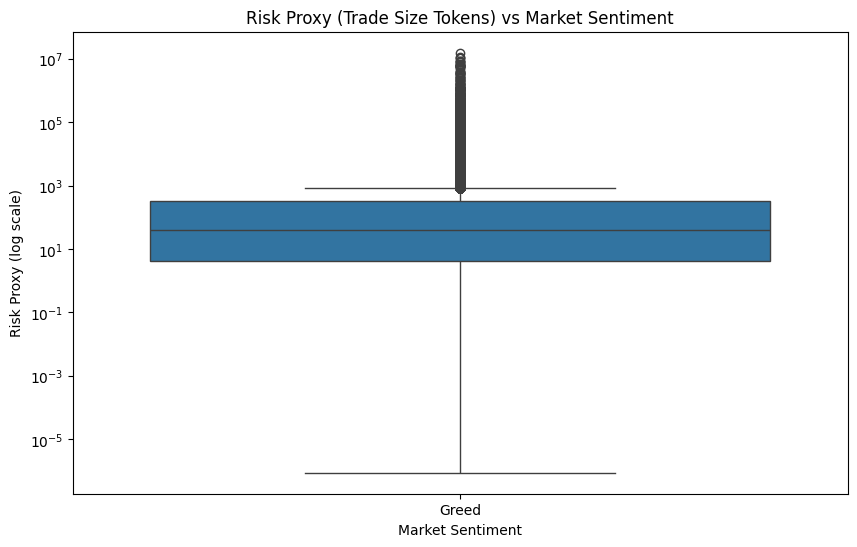

In [71]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_classification', y='risk_proxy', data=merged_data)
plt.yscale('log')
plt.title('Risk Proxy (Trade Size Tokens) vs Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Risk Proxy (log scale)')
plt.show()


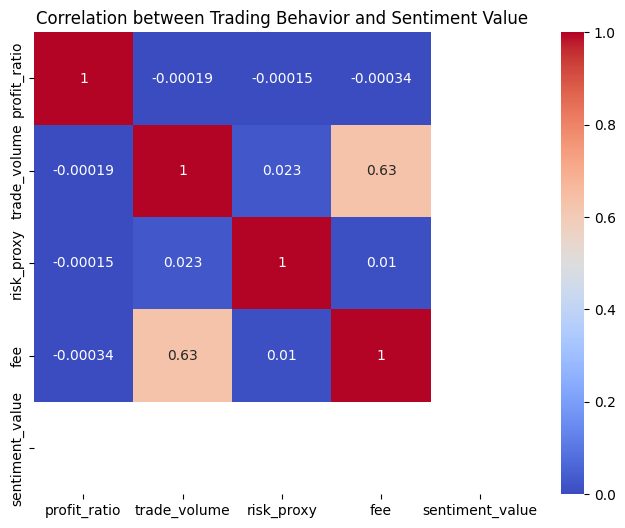

In [72]:
numeric_cols = ['profit_ratio', 'trade_volume', 'risk_proxy', 'fee', 'sentiment_value']
corr = merged_data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Trading Behavior and Sentiment Value')
plt.show()


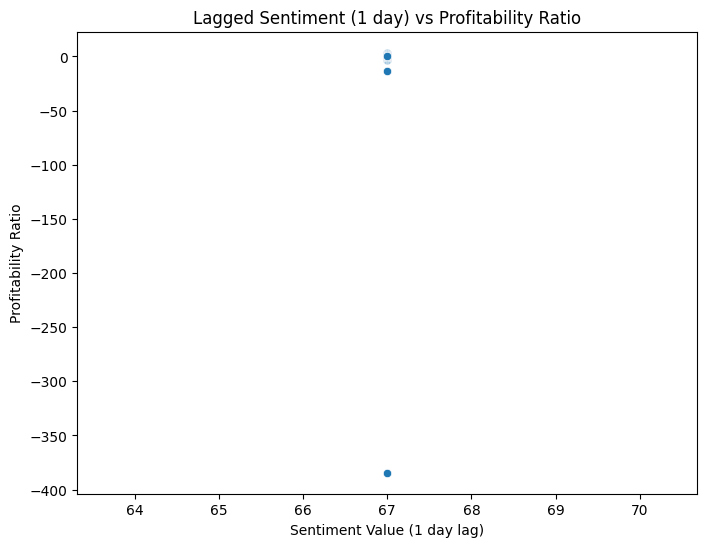

In [73]:
# Create lagged sentiment features (e.g., 1-day lag)
merged_data['sentiment_value_lag1d'] = merged_data['sentiment_value'].shift(24)

# Scatter plot: lagged sentiment vs profit ratio
plt.figure(figsize=(8,6))
sns.scatterplot(x='sentiment_value_lag1d', y='profit_ratio', data=merged_data)
plt.title('Lagged Sentiment (1 day) vs Profitability Ratio')
plt.xlabel('Sentiment Value (1 day lag)')
plt.ylabel('Profitability Ratio')
plt.show()
